# Training the LSTM model to understand and predict NTC stock prices on NEPSE (Nepal Stock Exchange)

Importing necessary modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pickle import dump

Preparing training data for processing

In [7]:
dataset_train = pd.read_csv('data/stockdata_train.csv', index_col=0)

In [8]:
dataset_train.head(5)

,S.N.,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,1,3/20/2011,442,446,446,446,0.0,200,89200
1,2,3/24/2011,460,462,460,462,0.0,1050,483600
2,3,3/25/2011,462,465,460,460,0.0,2360,1088780
3,4,3/27/2011,460,458,454,458,0.0,1740,795740
4,5,3/28/2011,458,458,450,450,0.0,1350,609940


In [9]:
training_set = dataset_train.iloc[:,2:3].values
training_set

array([[ 442],
       [ 460],
       [ 462],
       ...,
       [1090],
       [1115],
       [1175]], dtype=int64)

Scaling the data

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
sc = MinMaxScaler(feature_range=(0,1))

In [12]:
training_set_scaled = sc.fit_transform(training_set)

In [13]:
dump(sc,open('scaler.pkl','wb'))

Creating a data structure with 60 timesteps and 1 corresponding output

In [49]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X = training_set_scaled[i-60:i, 0]
    X_train.append(X)
    y = training_set_scaled[i, 0]
    y_train.append(y)

In [50]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [51]:
X_train.shape

(1240, 60)

In [52]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1) )

Creating and training a model consisting of four LSTM layers

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [54]:
regressor = Sequential()

In [55]:
aregressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

In [56]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [57]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [58]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [59]:
regressor.add(Dense(units = 1))

In [60]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [61]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 7s 73ms/step - loss: 0.0657
Epoch 2/100
39/39 [==============================] - 3s 74ms/step - loss: 0.0102
Epoch 3/100
39/39 [==============================] - 3s 74ms/step - loss: 0.0088
Epoch 4/100
39/39 [==============================] - 3s 74ms/step - loss: 0.0085
Epoch 5/100
39/39 [==============================] - 3s 73ms/step - loss: 0.0076
Epoch 6/100
39/39 [==============================] - 3s 74ms/step - loss: 0.0080
Epoch 7/100
39/39 [==============================] - 3s 73ms/step - loss: 0.0075
Epoch 8/100
39/39 [==============================] - 3s 73ms/step - loss: 0.0080
Epoch 9/100
39/39 [==============================] - 3s 73ms/step - loss: 0.0072
Epoch 10/100
39/39 [==============================] - 3s 75ms/step - loss: 0.0067
Epoch 11/100
39/39 [==============================] - 3s 80ms/step - loss: 0.0069
Epoch 12/100
39/39 [==============================] - 3s 72ms/step - loss: 0.0068
Epoch 13/100
39/39 [=====

Preparing test data

In [62]:
dataset_test = pd.read_csv('data/stockdata_test.csv', index_col=0)
dataset_test

,S.N.,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
1300,1301,1/3/2017,700,700,698,700,0,17405,12180560
1301,1302,1/4/2017,700,700,687,699,0,7960,5536610
1302,1303,1/5/2017,699,700,695,700,0,19050,13257900
1303,1304,1/8/2017,700,699,692,696,0,14885,10333025
1304,1305,1/9/2017,696,698,694,698,0,8260,5745830
...,...,...,...,...,...,...,...,...,...
1496,1497,11/13/2017,820,856,820,840,0,25598,21249296
1497,1498,11/14/2017,840,853,840,846,0,32070,27181430
1498,1499,11/15/2017,846,862,838,853,0,37362,31739620
1499,1500,11/16/2017,853,870,841,850,0,10575,9009255


In [63]:
real_stock = dataset_test.iloc[:, 2:3].values
real_stock

array([[700],
       [700],
       [699],
       [700],
       [696],
       [698],
       [695],
       [695],
       [695],
       [694],
       [695],
       [692],
       [690],
       [692],
       [695],
       [690],
       [683],
       [685],
       [677],
       [663],
       [660],
       [680],
       [670],
       [661],
       [665],
       [670],
       [660],
       [660],
       [655],
       [670],
       [667],
       [669],
       [660],
       [689],
       [682],
       [681],
       [675],
       [678],
       [634],
       [629],
       [633],
       [627],
       [624],
       [630],
       [628],
       [624],
       [620],
       [620],
       [625],
       [625],
       [635],
       [635],
       [635],
       [635],
       [630],
       [633],
       [634],
       [635],
       [640],
       [641],
       [640],
       [635],
       [639],
       [639],
       [635],
       [636],
       [649],
       [645],
       [640],
       [639],
       [635],
      

In [64]:
dataset_total = pd.concat([dataset_train['Open'], dataset_test['Open']], axis = 0)
dataset_total

0       442
1       460
2       462
3       460
4       458
       ... 
1496    820
1497    840
1498    846
1499    853
1500    850
Name: Open, Length: 1501, dtype: int64

In [65]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [66]:
inputs = inputs.reshape(-1,1)

In [67]:
inputs = sc.transform(inputs)
inputs

array([[0.94555874],
       [0.91977077],
       [0.94555874],
       [0.92836676],
       [0.92836676],
       [0.92836676],
       [0.92836676],
       [0.92836676],
       [0.91977077],
       [0.92836676],
       [0.95702006],
       [0.91977077],
       [0.9226361 ],
       [0.95702006],
       [0.93696275],
       [0.93982808],
       [0.90544413],
       [0.89971347],
       [0.90544413],
       [0.92836676],
       [0.92836676],
       [0.89971347],
       [0.9025788 ],
       [0.89111748],
       [0.87106017],
       [0.88538682],
       [0.89684814],
       [0.88825215],
       [0.91404011],
       [0.91404011],
       [0.88825215],
       [0.88538682],
       [0.94842407],
       [0.91404011],
       [0.8739255 ],
       [0.92550143],
       [0.88538682],
       [0.91404011],
       [0.91404011],
       [0.92550143],
       [0.92836676],
       [0.89971347],
       [0.89971347],
       [0.89971347],
       [0.90544413],
       [0.89971347],
       [0.89111748],
       [0.899

In [68]:
X_test = []
for i in range(60, len(inputs)):
    X = inputs[i-60:i, 0]
    X_test.append(X)

In [69]:
X_test = np.array(X_test)

In [70]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Running predictions on test data

In [71]:
predicted_stock = regressor.predict(X_test)

In [72]:
predicted_stock = sc.inverse_transform(predicted_stock)

In [73]:
predicted_stock

array([[686.5615 ],
       [688.81915],
       [691.1877 ],
       [692.66205],
       [693.47406],
       [692.99634],
       [692.415  ],
       [691.48474],
       [690.6315 ],
       [690.1168 ],
       [689.7462 ],
       [689.7401 ],
       [689.32166],
       [688.29926],
       [687.62524],
       [688.0174 ],
       [687.8523 ],
       [685.79297],
       [683.55365],
       [680.35895],
       [674.553  ],
       [667.9679 ],
       [666.6843 ],
       [667.37036],
       [666.4701 ],
       [665.18866],
       [665.15625],
       [663.96234],
       [661.9888 ],
       [659.10315],
       [659.25214],
       [660.94324],
       [663.0906 ],
       [662.98   ],
       [667.12573],
       [672.00195],
       [675.2302 ],
       [675.33057],
       [674.3252 ],
       [664.75946],
       [651.1306 ],
       [639.5975 ],
       [631.62726],
       [626.95953],
       [626.0969 ],
       [627.2623 ],
       [628.1224 ],
       [627.377  ],
       [625.58057],
       [624.4897 ],


In [ ]:
regressor.save('stockpredictor')

Comparing predictions with our real stock prices

Text(0, 0.5, 'Stock Price')

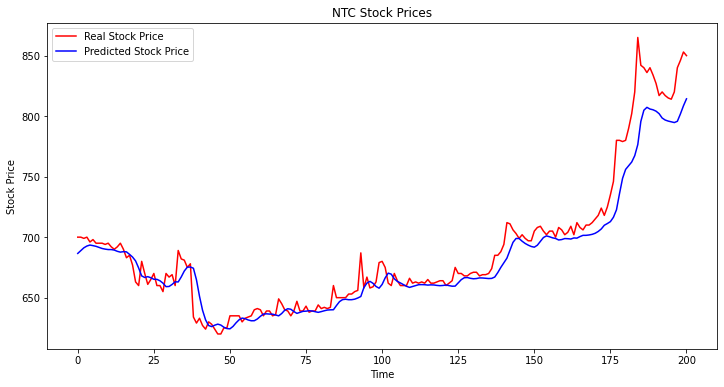

In [75]:
fig = plt.figure(figsize = (12, 6))
plt.plot(real_stock, color='red', label='Real Stock Price')
plt.plot(predicted_stock, color='blue', label='Predicted Stock Price')
plt.legend()
plt.title('NTC Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')

The model learned pretty well :-)